<a href="https://colab.research.google.com/github/TharunDD/XGboost/blob/main/scratch_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def initi_centroid(x,k):
  indices=np.random.choice(len(x),k,replace=False)
  return x[indices]

In [31]:
def assign_to_cluster(x,centroids):
  distance = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
  return np.argmin(distance,axis=1)

In [32]:
def update_centroid(x,lables,k):
  centroids=np.array([x[lables == i].mean(axis=0) for i in range(k)])
  return centroids

In [33]:
def k_means(x,k,max_itets=100):
  centroids=initi_centroid(x,k)
  for _ in range(max_itets):
    labels=assign_to_cluster(x,centroids)
    new_cent=update_centroid(x,labels,k)
    if np.all(centroids == new_cent):
      break
    centroids=new_cent
  return labels,centroids

In [34]:
np.random.seed(42)
x = np.concatenate([np.random.normal(loc=i, scale=1, size=(50, 2)) for i in range(5)])
k=5

In [35]:
k=5
labels,centroids=k_means(x,k);

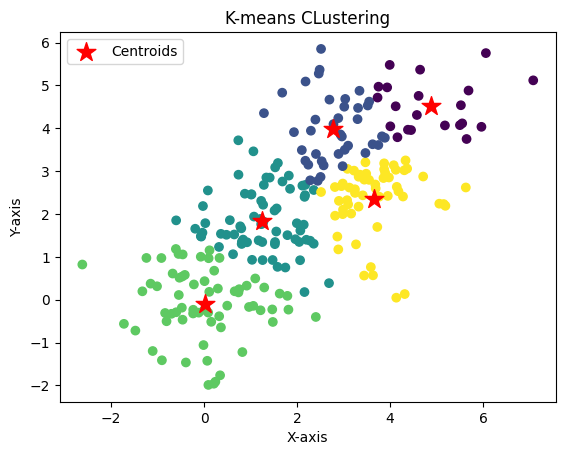

In [41]:
plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='*',s=200, c='red',label='Centroids' )
plt.title('K-means CLustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()